In [1]:
data = '''Midjourney
baseline v.s. gt
105 400 
0.2625 
cc v.s. gt
143 400 
0.3575 
cc v.s. baseline
266 400 
0.665 

Flux-1.1-pro
baseline v.s. gt
59 380 
0.15526315789473685 
cc v.s. gt
94 380 
0.24736842105263157 
cc v.s. baseline
226 380 
0.5947368421052631 

DALLE-3
baseline v.s. gt
69 400 
0.1725 
cc v.s. gt
94 400 
0.235 
cc v.s. baseline
234 400 
0.585 

Flux-1.0-dev
baseline v.s. gt
61 400 
0.1525 
cc v.s. gt
78 400 
0.195 
cc v.s. baseline
230 400 
0.575 

Stable-Diffusion-3
baseline v.s. gt
61 400 
0.1525 
cc v.s. gt
72 400 
0.18 
cc v.s. baseline
250 400 
0.625 
'''

model_data = data.split('\n\n')
model_data = [data.split('\n') for data in model_data]
model_b_wr = {}
model_c_wr = {}
model_cb_wr = {}
model_names = []
for data in model_data:
    model_name = data[0]
    model_names.append(model_name)
    model_b_wr[model_name] = float(data[3])
    model_c_wr[model_name] = float(data[6])
    model_cb_wr[model_name] = float(data[9])

print(model_b_wr)
print(model_c_wr)
print(model_cb_wr)



{'Midjourney': 0.2625, 'Flux-1.1-pro': 0.15526315789473685, 'DALLE-3': 0.1725, 'Flux-1.0-dev': 0.1525, 'Stable-Diffusion-3': 0.1525}
{'Midjourney': 0.3575, 'Flux-1.1-pro': 0.24736842105263157, 'DALLE-3': 0.235, 'Flux-1.0-dev': 0.195, 'Stable-Diffusion-3': 0.18}
{'Midjourney': 0.665, 'Flux-1.1-pro': 0.5947368421052631, 'DALLE-3': 0.585, 'Flux-1.0-dev': 0.575, 'Stable-Diffusion-3': 0.625}


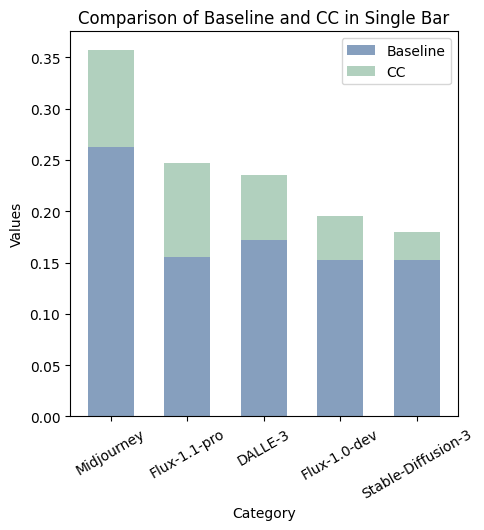

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = pd.DataFrame({
    'Category': model_names,
    'A': [model_b_wr[model] for model in model_names],
    'B': [model_c_wr[model] for model in model_names],
})


# 设置自定义颜色
color_A = "#869fbe"  # A的颜色
color_B = "#b1d0be"  # B的颜色

# 绘制堆叠条形图
plt.figure(figsize=(5, 5))

# A作为底部条形
plt.bar(data['Category'], data['A'], color=color_A, label='Baseline',width=0.6)

# B - A的差值作为顶部条形，以实现堆叠效果
plt.bar(data['Category'], data['B'] - data['A'], bottom=data['A'], color=color_B, label='CC', width=0.6)

# 添加标签和图例
plt.xticks(rotation = 30)
plt.xlabel('Category')
plt.ylabel('Values')
plt.title('Comparison of Baseline and CC in Single Bar')
plt.legend()

# 显示图形
plt.show()

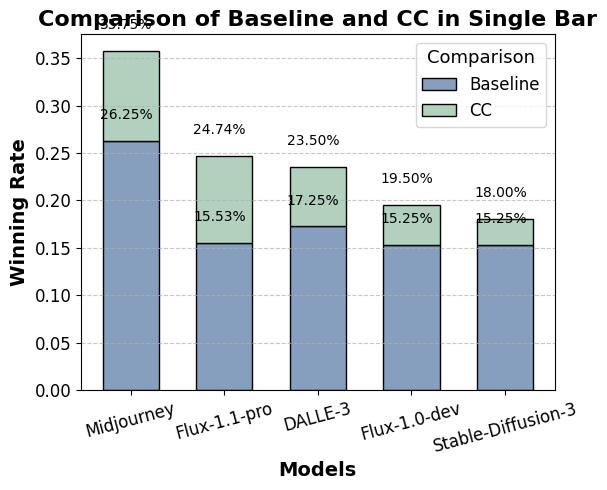

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


data = pd.DataFrame({
    'Category': model_names,
    'A': [model_b_wr[model] for model in model_names],
    'B': [model_c_wr[model] for model in model_names],
})

# Custom colors
color_A = "#869fbe"  # Baseline color
color_B = "#b1d0be"  # CC color

# Plot
plt.figure(figsize=(6, 5))

# Baseline bar
bars1 = plt.bar(data['Category'], data['A'], color=color_A, label='Baseline', width=0.6, edgecolor="black")

# CC - Baseline difference as the stacked portion
bars2 = plt.bar(data['Category'], data['B'] - data['A'], bottom=data['A'], color=color_B, label='CC', width=0.6, edgecolor="black")

# Adding data labels, formatted as percentages
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.05, yval + 0.02, f'{yval:.2%}', ha='center', va='bottom', fontsize=10, color='black')

for bar, base in zip(bars2, data['A']):
    yval = base + bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.05, yval + 0.02, f'{yval:.2%}', ha='center', va='bottom', fontsize=10, color='black')

# Customize the plot
plt.xticks(rotation=15, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Models', fontsize=14, fontweight='bold')
plt.ylabel('Winning Rate', fontsize=14, fontweight='bold')
plt.title('Comparison of Baseline and CC in Single Bar', fontsize=16, fontweight='bold')
plt.legend(title="Comparison", fontsize=12, title_fontsize='13')

# Adding gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot 
plt.tight_layout()
plt.savefig("Winningrate.pdf", format="pdf", dpi = 300)
plt.show()

['Midjourney', 'Midjourney', 'Flux-1.1-pro', 'Flux-1.1-pro', 'DALLE-3', 'DALLE-3', 'Flux-1.0-dev', 'Flux-1.0-dev', 'Stable-Diffusion-3', 'Stable-Diffusion-3']


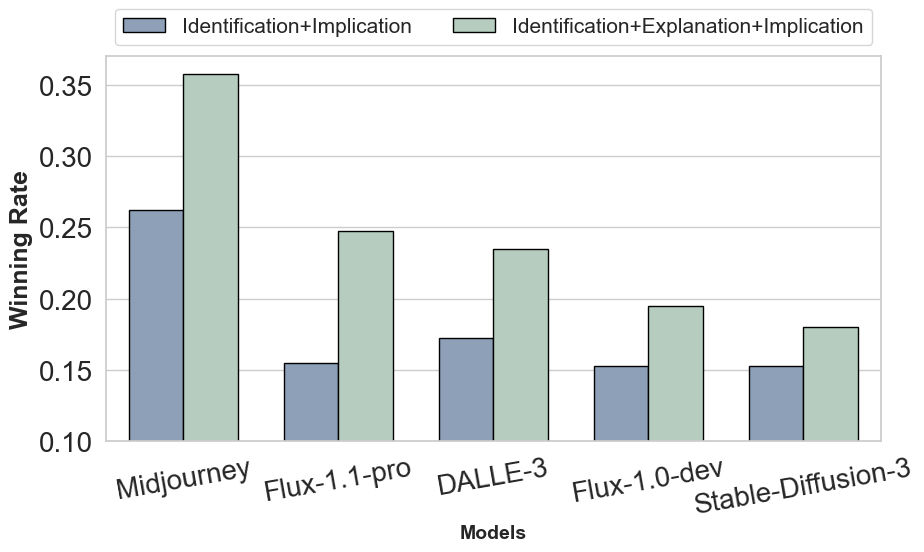

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def multi_bar(data, title, color):

    df = pd.DataFrame(data)

    # 设置图形风格
    sns.set(style="whitegrid")

    palette = color
    # 创建条形图
    plt.figure(figsize=(10, 5))
    bar_plot = sns.barplot(x='Models', y='Value', hue='Metric', data=df, width=0.7, errorbar=None, palette=palette, edgecolor = 'black')

    plt.ylim(0, None)
    # 获取条形图的所有位置和宽度
    bars = bar_plot.patches

    # # 添加误差棒
    # for bar, error in zip(bars, df['Error']):
    #     bar_x = bar.get_x() + bar.get_width() / 2
    #     bar_y = bar.get_height()
    #     bar_plot.errorbar(bar_x, bar_y, yerr=error, fmt='none', c='#9f9f9f', capsize=5)

    # 添加图形标题和标签
    plt.title(title)
    plt.xticks(rotation = 10)
    plt.xlabel('Models', fontsize=14, fontweight='bold')
    plt.ylabel('Winning Rate', fontsize=18, fontweight='bold')

    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.ylim(0.1, 0.37)
    # 显示图形
    plt.legend(
        fontsize=15,
        loc='upper center',       # 将图例放置在图的上方中心位置
        bbox_to_anchor=(0.5, 1.15), # 控制图例相对于图的位置
        ncol=3                    # 图例在一行展示
    )
    plt.savefig("Winningrate.pdf", format="pdf", dpi = 300)

    plt.show()

# # 示例数据
# data = {
#     'Metric': ['A', 'B', 'C', 'A', 'B', 'C'],
#     'Value': [10, 15, 7, 8, 12, 5],
#     'Error': [1, 2, 1.5, 0.5, 1, 1],
#     'Models': ['Multi-Agent', 'Multi-Agent', 'Multi-Agent', 'Single-Agent', 'Single-Agent', 'Single-Agent'],
# }
# color =  {'A': '#dea3a2', 'B': '#fadcb4', 'C': '#a7b9d7'}

temp_models = []
for model in model_names:
    temp_models.append(model)
    temp_models.append(model)
temp_v = []
for model in model_names:
    temp_v.append(model_b_wr[model])
    temp_v.append(model_c_wr[model])

print(temp_models)

data = pd.DataFrame({
    'Metric': ['Identification+Implication', 'Identification+Explanation+Implication']*len(model_names),
    'Models': temp_models,
    'Value' : temp_v,
    'Error' : [0] * (len(model_names) *2)
})

# Custom colors
color_A = "#869fbe"  # Baseline color
color_B = "#b1d0be"  # CC color
color =  {'Identification+Implication': '#869fbe', 'Identification+Explanation+Implication': '#b1d0be'}



multi_bar(data, '',color)